# Customer Lifetime Value

Customer lifetime value is the metric that indicates the total revenue a business can reasonably expect from a single customer account. 

Using this metric one can identify significant customer segments that are the most valuable to the company.

Customers can be get segmented into 4 different class on the basis of their CLV & In order to maintain a long-term relationship with customers, companies need to schedule specific schemes for every class such as the discount, offers, coupons, etc.

**Calculating the CLV** : 

Step 1 : Calculate Avg Purchase Value (APV)

Step 2 : Calculate Avg. Purchase Freq. rate

Step 3 : Customer Value = Avg Purchase Value * Avg Purchase Freq Rate

Step 4 : Calculate Avg. customer lifespan

Step 5 : **Customer Lifetime Value** = Customer Value * Avg. customer lifespan

Reference : https://blog.hubspot.com/service/how-to-calculate-customer-lifetime-value

In [2]:
import pandas as pd
import numpy as np

**STEP 1 : Importing the dataset & cleaning / removing non required columns (Data PreProcessing)**

In [3]:
dataframe = pd.read_csv('CLVData.csv')

In [4]:
dataframe

,Unnamed: 0,user_id,book_id,Total Price,event_type,Date
0,0,816103,29906,236,purchase,2018-08-13
1,1,359399,178909,604,view,2019-10-06
2,2,171915,1739050,350,view,2019-10-07
3,3,303818,898,337,purchase,2019-04-28
4,4,368330,939421,481,purchase,2018-11-29
...,...,...,...,...,...,...
9999995,9999995,19503,336635,585,purchase,2020-01-17
9999996,9999996,19503,70810,51,view,2019-08-09
9999997,9999997,73840,35825,250,view,2020-07-31
9999998,9999998,152667,25427,197,purchase,2019-07-20


In [5]:
# dataframe.drop('is_read', axis = 1, inplace = True)
# dataframe.drop('rating', axis = 1, inplace = True)
# dataframe.drop('is_reviewed', axis = 1, inplace = True)
dataframe.drop('Unnamed: 0', axis = 1, inplace = True)
dataframe

,user_id,book_id,Total Price,event_type,Date
0,816103,29906,236,purchase,2018-08-13
1,359399,178909,604,view,2019-10-06
2,171915,1739050,350,view,2019-10-07
3,303818,898,337,purchase,2019-04-28
4,368330,939421,481,purchase,2018-11-29
...,...,...,...,...,...
9999995,19503,336635,585,purchase,2020-01-17
9999996,19503,70810,51,view,2019-08-09
9999997,73840,35825,250,view,2020-07-31
9999998,152667,25427,197,purchase,2019-07-20


In [6]:
dataframe.rename(columns = {'event_type': 'Frequency'}, inplace=True)
dataframe

,user_id,book_id,Total Price,Frequency,Date
0,816103,29906,236,purchase,2018-08-13
1,359399,178909,604,view,2019-10-06
2,171915,1739050,350,view,2019-10-07
3,303818,898,337,purchase,2019-04-28
4,368330,939421,481,purchase,2018-11-29
...,...,...,...,...,...
9999995,19503,336635,585,purchase,2020-01-17
9999996,19503,70810,51,view,2019-08-09
9999997,73840,35825,250,view,2020-07-31
9999998,152667,25427,197,purchase,2019-07-20


**STEP 2 : Performing group by on the basis of User ID & aggregating the required fields** 

In [7]:
new = dataframe[(dataframe['Frequency']=='purchase')].groupby(['user_id']).agg({'Total Price': 'sum','Frequency':'count'})
new

,Total Price,Frequency
user_id,,
0,11286,26
1,538,1
2,1740,4
3,5441,14
4,459,1
...,...,...
876135,625,1
876136,736,2
876138,116,1


**STEP 3 : Calculating the 'Average Purchase Value' using the formula, Total Revenue generated by the Customer in the time period / Number of purchases by the Customer in the same time period**

In [8]:
new['Average purchase value']=((new['Total Price'])/new['Frequency']).astype(int)
new

,Total Price,Frequency,Average purchase value
user_id,,,
0,11286,26,434
1,538,1,538
2,1740,4,435
3,5441,14,388
4,459,1,459
...,...,...,...
876135,625,1,625
876136,736,2,368
876138,116,1,116


**STEP 4 : Calculating the 'Average Purchase Frequency Rate' using the formula, {(Total Number of Purchases) / (Number of unique Customers to make those purchases)}**

In [9]:
(dataframe['Frequency']=='purchase').sum()

4998411

In [10]:
len(dataframe.user_id.unique())


721578

**Hence the 'Average Purchase Frequency Rate' = {(4998411) / (721578)} = 6.9270557029**

In [11]:
new

,Total Price,Frequency,Average purchase value
user_id,,,
0,11286,26,434
1,538,1,538
2,1740,4,435
3,5441,14,388
4,459,1,459
...,...,...,...
876135,625,1,625
876136,736,2,368
876138,116,1,116


**STEP 5 : Calculating the 'Customer Value' using the formula, {(Average purchase value of a Customer) * (Average Purchase Frequency Rate)}**

In [12]:
new['Customer Value']=((new['Average purchase value']*6.93).astype(int))
new

,Total Price,Frequency,Average purchase value,Customer Value
user_id,,,,
0,11286,26,434,3007
1,538,1,538,3728
2,1740,4,435,3014
3,5441,14,388,2688
4,459,1,459,3180
...,...,...,...,...
876135,625,1,625,4331
876136,736,2,368,2550
876138,116,1,116,803


**STEP 6 : Calculating the 'Average Customer Lifespan' 
As we have the records in our datasets from the year Goodreads was founded which is 2006. Almost 99.9% Customers have been there from the beginning of the year 2006 & Hence 'Average Customer Lifespan' of each customer is 14 Years.**

**STEP 7 : Calculating the 'Customer Lifetime Value' using the formula, {(Customer Value) * (Average Customer Lifespan)}.
Since the data that we currently worked on is of 2 years which is from 2018-2020, we have got the Customer value of each customer of those 2 years. Hence we'll multiply the current 'Customer Value' by 7 instead of 14 to get the 'Customer Lifetime Value'**

In [13]:
new['Customer Lifetime Value']=(new['Customer Value']*7).astype(int)
new

,Total Price,Frequency,Average purchase value,Customer Value,Customer Lifetime Value
user_id,,,,,
0,11286,26,434,3007,21049
1,538,1,538,3728,26096
2,1740,4,435,3014,21098
3,5441,14,388,2688,18816
4,459,1,459,3180,22260
...,...,...,...,...,...
876135,625,1,625,4331,30317
876136,736,2,368,2550,17850
876138,116,1,116,803,5621


**STEP 8 : Plotting a histogram on the basis of 'Customer Lifetime Value'**

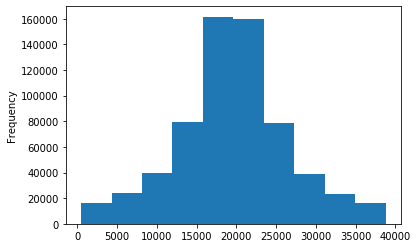

In [14]:
import matplotlib.pyplot as plt
new['Customer Lifetime Value'].plot(kind='hist')

**STEP 9 : Categorizing the customers in 4 different leveles on the basis of their 'Customer Lifetime Value'**

In [15]:
crite = [new['Customer Lifetime Value'].between(0, 10000), 
            new['Customer Lifetime Value'].between(10001, 20000), 
            new['Customer Lifetime Value'].between(20001, 30000),
            new['Customer Lifetime Value'].between(30001, 40000)]
levels = ['Copper', 'Silver', 'Gold', 'Platinum']

new['CLV Category'] = np.select(crite, levels, 'Platinum' )
new

,Total Price,Frequency,Average purchase value,Customer Value,Customer Lifetime Value,CLV Category
user_id,,,,,,
0,11286,26,434,3007,21049,Gold
1,538,1,538,3728,26096,Gold
2,1740,4,435,3014,21098,Gold
3,5441,14,388,2688,18816,Silver
4,459,1,459,3180,22260,Gold
...,...,...,...,...,...,...
876135,625,1,625,4331,30317,Platinum
876136,736,2,368,2550,17850,Silver
876138,116,1,116,803,5621,Copper


In [17]:
new.to_csv('CLVTableau.csv')